In [3]:
import datetime              as dt
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics
import pandas                as pd
import matplotlib.pyplot     as plt
import warnings

from sklearn.preprocessing import minmax_scale

warnings.filterwarnings('ignore')

In [4]:
#downloading product orders dataset. to first trials.
#do we have to reference the 'read_csv'direct to the github folder?
orders = pd.read_csv('https://bsa-correlation-one.s3.amazonaws.com/202003131045_orders.csv')
orders.head(5)

,purchase_timestamp,seller_id,product_gtin,product_sku,channel_slug,channel_store,price,freight_value,price_freight_shift,commission_product_olist,commission_freight_olist,origin_zip,origin_state,origin_city,destination_zip,destination_state,destination_city
0,2019-07-20 11:19:43,a97001a2-a7d2-4bd6-b0d5-1da2a2b8abd9,6952202281890,PRDWRHUYLLMFX2U0,mercadolivre,mercadolivre,82.99,20.86,0.0,0.20,0.20,1109010,SP,SAO PAULO,89265575,SC,Jaraguá do Sul
1,2019-11-11 20:43:23,a97001a2-a7d2-4bd6-b0d5-1da2a2b8abd9,6951003643197,PRDACYVT895VMO7H,mercadolivre,mercadolivre,119.90,0.00,0.0,0.20,0.20,1109010,SP,SAO PAULO,06040470,SP,Osasco
2,2020-03-01 16:25:00,c58b83e5-52de-43fe-8399-a7bc312e2aa5,7898907175302,PRDKTDU50G9FVV57,cnova,ex,39.90,14.24,0.0,0.19,0.19,20910970,RJ,RIO DE JANEIRO,22260210,RJ,Rio de Janeiro
3,2020-02-04 12:04:10,a97001a2-a7d2-4bd6-b0d5-1da2a2b8abd9,6951003643197,PRDACYVT895VMO7H,mercadolivre,mercadolivre,130.95,0.00,0.0,0.20,0.20,1109010,SP,SAO PAULO,89062100,SC,Blumenau
4,2018-12-14 13:52:19,a97001a2-a7d2-4bd6-b0d5-1da2a2b8abd9,6951003643197,PRDACYVT895VMO7H,mercadolivre,mercadolivre,128.99,21.51,0.0,0.20,0.20,1109010,SP,SAO PAULO,66055000,PA,Belém


In [4]:
#checking range of dates aka 'purchase_timestamp'
orders['purchase_timestamp'] = pd.to_datetime(orders['purchase_timestamp'])  
orders['date'] = orders['purchase_timestamp'].dt.date
orders.sort_values('purchase_timestamp').iloc[[0,-1]]

,purchase_timestamp,seller_id,product_gtin,product_sku,channel_slug,channel_store,price,freight_value,price_freight_shift,commission_product_olist,commission_freight_olist,origin_zip,origin_state,origin_city,destination_zip,destination_state,destination_city,date
24613,2015-09-23 13:00:13,ae3537b0-1bba-4690-8219-d4be662e1f6a,7899893323067,OLT1FE68051DD0E,cnova,cnova,168.00,0.0,0.0,0.20,0.00,5138100,SP,São Paulo,95720000,RS,Garibaldi,2015-09-23
36494,2020-03-13 07:37:36,5fc08652-2e29-45c8-a967-428d73dd35e0,7897181941436,PRD4ZU8AMTULO709,mercadolivre,mercadolivre,94.05,0.0,0.0,0.16,0.16,6422120,SP,Barueri,24210200,RJ,Niterói,2020-03-13


In [5]:
orders[['price', 'freight_value', 'price_freight_shift', 'commission_product_olist', 'commission_freight_olist']].describe()

,price,freight_value,price_freight_shift,commission_product_olist,commission_freight_olist
count,40997.000000,40997.000000,40997.000000,40997.000000,40997.000000
mean,110.292697,18.431204,0.110380,0.192374,0.188754
std,139.258356,17.080063,1.511568,0.016219,0.030310
min,6.920000,0.000000,0.000000,0.090000,0.000000
25%,35.130000,8.530000,0.000000,0.190000,0.190000
50%,71.900000,16.220000,0.000000,0.200000,0.200000
75%,134.900000,23.110000,0.000000,0.200000,0.200000
max,5079.940000,344.700000,72.900000,0.250000,0.250000


In [6]:
orders['product_gtin'].nunique()

647

**We can see that there's no NaN in our dataset**

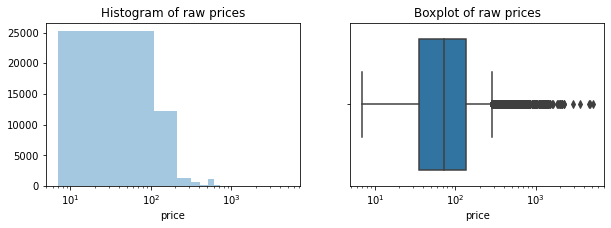

In [7]:
plotsize = (10, 3)
fig, ax = plt.subplots(1,2, figsize = plotsize)
ax1 = sns.distplot(orders['price'], ax=ax[0], kde=False)
ax2 = sns.boxplot(orders['price'], ax=ax[1])
ax1.set_title('Histogram of raw prices')
ax2.set_title('Boxplot of raw prices')
ax1.set_xscale('log')
ax2.set_xscale('log')


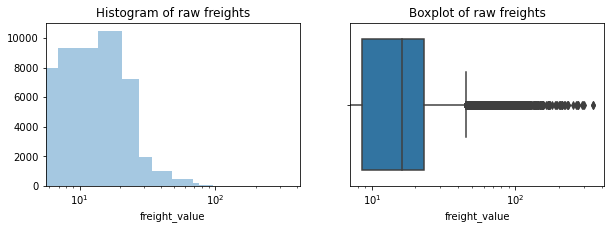

In [8]:
plotsize = (10, 3)
fig, ax = plt.subplots(1,2, figsize = plotsize)
ax3 = sns.distplot(orders['freight_value'], ax=ax[0], kde=False)
ax4 = sns.boxplot(orders['freight_value'], ax=ax[1])
ax3.set_title('Histogram of raw freights')
ax4.set_title('Boxplot of raw freights')
ax3.set_xscale('log')
ax4.set_xscale('log')

**The histograms and boxplots indicates a high dispersion of price and freight. For price, mostly of data are below 200 reais and for freight below 40 reais. Booth information were expected once Olist sell any kind of product, at any value. Perhaps a good approach to understand the data would be put them on scale by each product_gtin.**

In [9]:
orders['price_sc'] = orders.groupby('product_gtin').price.transform(lambda x: minmax_scale(x.astype(float)))
orders['freight_sc'] = orders.groupby('product_gtin').freight_value.transform(lambda x: minmax_scale(x.astype(float)))

Text(0.5, 1.0, 'Boxplot of Scaled prices')

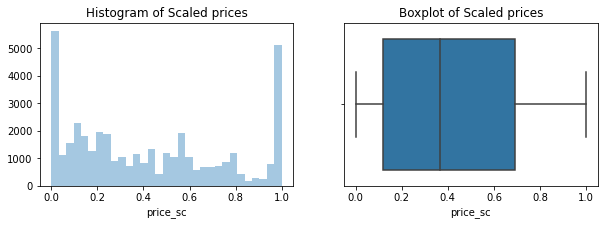

In [10]:
plotsize = (10, 3)
fig, ax = plt.subplots(1,2, figsize = plotsize)
ax1 = sns.distplot(orders['price_sc'], ax=ax[0], kde=False)
ax2 = sns.boxplot(orders['price_sc'], ax=ax[1])
ax1.set_title('Histogram of Scaled prices')
ax2.set_title('Boxplot of Scaled prices')


Text(0.5, 1.0, 'Boxplot of Scaled freight')

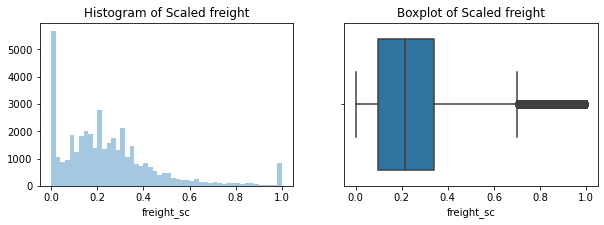

In [11]:
plotsize = (10, 3)
fig, ax = plt.subplots(1,2, figsize = plotsize)
ax1 = sns.distplot(orders['freight_sc'], ax=ax[0], kde=False)
ax2 = sns.boxplot(orders['freight_sc'], ax=ax[1])
ax1.set_title('Histogram of Scaled freight')
ax2.set_title('Boxplot of Scaled freight')


**It's possible observe a concentration of prices at min and max for each gtin. An the the possible 'outliers was as a matter of fact, products with differents prices. For freights, we have a high concentration near the min.**

In [12]:
#Looking for the most frequent orders bby gtin.
#Here, we don't have the information of how many units was each order.
#As at least one product was sold at each order, I considered that I sell one product by order.
#I choose an random column to count the rows and identify how many orders we have for each gtin
orders_bygtin = orders.groupby(by=['product_gtin'])['seller_id'].count().sort_values(ascending = False).to_frame().rename(columns={'seller_id': 'n_orders'})
orders_bygtin = orders_bygtin.reset_index()
orders_bygtin['share'] = orders_bygtin['n_orders']/orders_bygtin['n_orders'].sum() * 100
orders_bygtin['rank'] = orders_bygtin['share'].rank(method = 'first', ascending = False).astype(int)
orders_bygtin.head(10)

,product_gtin,n_orders,share,rank
0,8800550956404,2859,6.973681,1
1,7899495703106,2079,5.071103,2
2,7909389621864,1999,4.875967,3
3,7895099385786,1652,4.029563,4
4,7892049060281,1614,3.936873,5
5,7908243600137,1187,2.895334,6
6,7898605383559,977,2.383101,7
7,6951003643197,917,2.236749,8
8,7898554982766,907,2.212357,9
9,7892509104128,834,2.034295,10


In [13]:
orders['product_gtin'].nunique()

647

In [14]:
value =  orders_bygtin['share'][orders_bygtin['rank'] <= 20].sum().astype(str)
print('The top 20 products represents ' + value + '% of sales')

The top 20 products represents 48.86455106471205% of sales


In [15]:
orders_byrev = orders.groupby(by=['product_gtin'])['price'].sum().sort_values(ascending = False).to_frame().rename(columns={'price': 'revenue'})
orders_byrev = orders_byrev.reset_index()
orders_byrev['share'] = orders_byrev['revenue']/orders_byrev['revenue'].sum() * 100
orders_byrev['rank'] = orders_byrev['share'].rank(method = 'first', ascending = False).astype(int)
orders_byrev.head(10)

,product_gtin,revenue,share,rank
0,7892509104128,476295.40,10.533618,1
1,7909389621864,299414.59,6.621771,2
2,7899495703106,289927.63,6.411960,3
3,7908243600137,198415.24,4.388097,4
4,6951003643197,121700.74,2.691500,5
5,8800550956404,112004.24,2.477055,6
6,7897181941436,92982.58,2.056377,7
7,7894203014031,77549.55,1.715064,8
8,7897889805825,76231.64,1.685918,9
9,619960626351,72630.74,1.606281,10


In [16]:
value =  orders_byrev['share'][orders_byrev['rank'] <= 20].sum().astype(str)
print('The top 20 products represents ' + value + '% of revenues')

The top 20 products represents 52.62487671893607% of revenues


In [47]:
#Merging rank of sales and revenues with orders
orders = orders.merge(orders_bygtin[['product_gtin', 'rank']], on = 'product_gtin').rename({'rank':'rank_sales'})

In [49]:
orders['year'] = orders['purchase_timestamp'].dt.year
list_gtins_2020 = orders['product_gtin'][(orders['year'] == 2020) & (orders['rank'] <=20)]

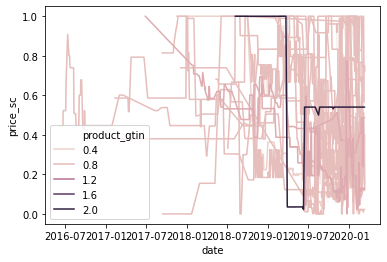

In [50]:
sns.lineplot(x='date', y='price_sc', hue = orders['product_gtin'][orders['product_gtin'].isin(list_gtins_2020)], data=orders)

The plot of top 20's price gtins over time shows differents behaviours. So, we cannot analyse them as one single product